In [1]:
import json
import numpy as np
import pandas as pd

from helpers import classifier_wlan_spectral_utils as classifier_utils

1 Physical GPUs, 1 Logical GPUs


In [2]:
dir_file='./results/final_byte_results/'
file_name = '101220122056_num_classes_3_frames_results'
json_result_file = dir_file+file_name+'.json'

In [3]:
with open(json_result_file) as json_file:
    results = json.load(json_file)

In [4]:
#print(json.dumps(results, indent=4))

In [5]:
print(results['experiment_setup'])

{'class_labels': ['Mgmt', 'Ctrl', 'Data'], 'iq_lengths': [1546], 'num_experiments': 5, 'trained_models': ['GRU', 'CNN'], 'task': 'frames'}


In [20]:
#experiment result global params
task_labels=results['experiment_setup']['class_labels']
iq_lengths = results['experiment_setup']['iq_lengths']
num_exp = int(results['experiment_setup']['num_experiments'])
nn_arch = results['experiment_setup']['trained_models']
length_float = "{:.6f}"
#iq_lengths = [100, 300, 500, 800, 1000, 3000]

In [21]:
print("Labels: ", task_labels)
print("IQ sample lenghts: ", iq_lengths)
print("Number of experiments: ", num_exp)
print("Trained models: ", nn_arch)

Labels:  ['Mgmt', 'Ctrl', 'Data']
IQ sample lenghts:  [1546]
Number of experiments:  5
Trained models:  ['GRU', 'CNN']


In [22]:
evals=['prediction_time_training']
length_float = "{:.10f}"

In [23]:
results_prediction={}
for iq in iq_lengths:
    iq=str(iq)
    results_prediction[iq] ={}
    for nn in nn_arch:
        results_prediction[iq][nn]={}
        for e in evals:
            #print(nn, iq, e)
            temp = []
            for exp in range(0,num_exp):
                #print(results_back[nn][iq][exp][e][accu])
                temp.append(results[nn][iq][exp][e]['t_sample'])
            temp = np.array(temp)
            #print(temp)
            #print("Mean temp:       ", temp.mean())
            #print("Standard temp:", temp.std())
            #print("Minimum temp:    ", temp.min())
            #print("Maximum temp:    ", temp.max())
            stats_results = {}
            stats_results['Min'] =  length_float.format(temp.min()*1000)
            stats_results['Max'] =  length_float.format(temp.max()*1000)
            stats_results['Mean'] = length_float.format(temp.mean()*1000)
            stats_results['Standard deviation'] = length_float.format(temp.std()*1000)
            
        results_prediction[iq][nn][e]=stats_results

In [24]:
print(json.dumps(results_prediction, indent=4))

{
    "1546": {
        "GRU": {
            "prediction_time_training": {
                "Min": "2.2446183763",
                "Max": "2.3712248772",
                "Mean": "2.3190234224",
                "Standard deviation": "0.0480533823"
            }
        },
        "CNN": {
            "prediction_time_training": {
                "Min": "0.0612005666",
                "Max": "0.0671919623",
                "Mean": "0.0638243173",
                "Standard deviation": "0.0023631082"
            }
        }
    }
}


In [25]:
#idx for specific results
evals = ['Training', 'Validation', 'Test']
loss = 0
accu = 1

In [35]:
results_to_plot={}
for nn in nn_arch:
    results_to_plot[nn]={}
    temp_iq_lenght_best_acc = []
    temp_iq_lenght_epoch = []
    temp_iq_lenght = []
    for iq in iq_lengths:
        iq=str(iq)
        temp_iq_lenght.append(iq)
        #print(nn, iq, e)
        temp_acc = []
        temp_epoch = []
        for exp in range(0,num_exp):
            print(results[nn][iq][exp]['Test'][accu])
            temp_acc.append(results[nn][iq][exp]['Test'][accu])
        temp_acc = np.array(temp_acc)
        temp_iq_lenght_best_acc.append(length_float.format(temp_acc.max()))
        mean_time_per_epoch = length_float.format(np.array(results[nn][iq][np.argmax(temp_acc)]['epoch_times']).mean())
        temp_iq_lenght_epoch.append(mean_time_per_epoch)
    results_to_plot[nn]['Best Test Accuracy']=temp_iq_lenght_best_acc
    results_to_plot[nn]['Mean time per epoch']=temp_iq_lenght_epoch
results_to_plot['Length IQ samples']=temp_iq_lenght

0.9999556541442871
0.9999113082885742
0.9999113082885742
0.9999113082885742
0.9997338652610779
0.9999556541442871
0.9999556541442871
1.0
0.9999556541442871
0.9999556541442871


In [27]:
#print(json.dumps(results_to_plot, indent=4))

In [28]:
best_results_file = dir_file+file_name+'_best_results.json'
with open(best_results_file, 'w') as outfile:
    json.dump(results_to_plot, outfile)

In [29]:
test_acc_cnn = np.array(results_to_plot['CNN']['Best Test Accuracy'], dtype=np.float)
mean_time_epoch_cnn = np.array(results_to_plot['CNN']['Mean time per epoch'],  dtype=np.float)
test_acc_lstm = np.array(results_to_plot['GRU']['Best Test Accuracy'], dtype=np.float)
mean_time_epoch_lstm = np.array(results_to_plot['GRU']['Mean time per epoch'],  dtype=np.float)
iq_sample_size = np.array(results_to_plot['Length IQ samples'],  dtype=np.float)
print(test_acc_cnn)
print(mean_time_epoch_cnn)
print(test_acc_lstm)
print(mean_time_epoch_lstm)
print(iq_sample_size)

[1.]
[23.28318444]
[0.99995565]
[517.68554839]
[1546.]


In [30]:
import importlib
importlib.reload(classifier_utils)

<module 'helpers.classifier_wlan_spectral_utils' from 'C:\\Users\\migue\\development\\traffic-recognition-2020\\source_code\\python\\helpers\\classifier_wlan_spectral_utils.py'>

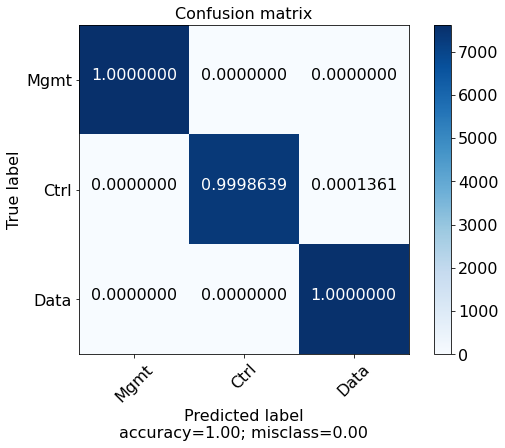

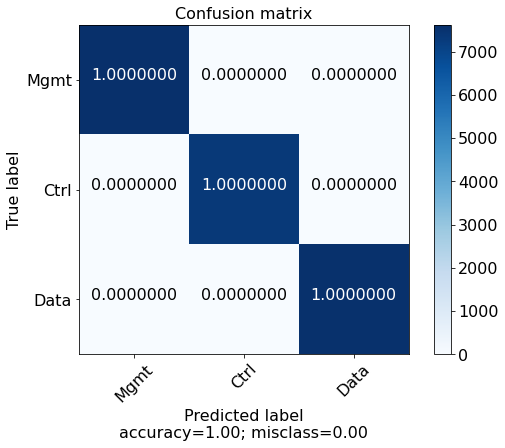

In [34]:
dir_to_save = './results/'
for iq in iq_lengths:
    iq=str(iq)
    for nn in nn_arch:
        results_to_plot[nn]={}
        temp_acc = []
        for exp in range(0,num_exp):
            temp_acc.append(results[nn][iq][exp]['Test'][accu])
        best_experiment = np.argmax(temp_acc)
            #print(results[nn][iq][np.argmax(temp_acc)])
        cm=np.array(results[nn][iq][best_experiment]['confusion_matrix'])
        file_name_cm = file_name + "_"+nn+"_iq_samples_"+str(iq)+".pdf" 
        classifier_utils.plot_confusion_matrix_mc(task_labels, file_name_cm, cm_dir=dir_to_save, cm = cm, precision = "{:0.7f}")

In [18]:
#idx for specific results
evals = ['prediction_time_training']
results_for_prediction={}
for iq in iq_lengths:
    iq=str(iq)
    results_for_prediction[iq] ={}
    for nn in nn_arch:
        results_for_prediction[iq][nn]={}
        for e in evals:
            #print(nn, iq, e)
            temp = []
            for exp in range(0,num_exp):
                #print(results_back[nn][iq][exp][e][accu])
                temp.append(results[nn][iq][exp][e]['t_sample'])
            temp = np.array(temp)
            stats_results = {}
            stats_results['Min'] =  length_float.format(temp.min()*1000)
            stats_results['Max'] =  length_float.format(temp.max()*1000)
            stats_results['Mean'] = length_float.format(temp.mean()*1000)
            stats_results['Standard deviation'] = length_float.format(temp.std()*1000)
            
        results_for_prediction[iq][nn][e]=stats_results

In [19]:
print(json.dumps(results_for_prediction, indent=4))

{
    "1546": {
        "GRU": {
            "prediction_time_training": {
                "Min": "2.24461838",
                "Max": "2.37122488",
                "Mean": "2.31902342",
                "Standard deviation": "0.04805338"
            }
        },
        "CNN": {
            "prediction_time_training": {
                "Min": "0.06120057",
                "Max": "0.06719196",
                "Mean": "0.06382432",
                "Standard deviation": "0.00236311"
            }
        }
    }
}
